# 2020 Denmark Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this Analysis
- initial exploration of cleaned datasets for happiness and cases in Denmark
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
denmark_hap_filter = pd.read_csv('../data/cleaned_data/2020/denmark_hap_cleaned.csv')
denmark_cov=pd.read_csv('../data/cleaned_data/2020/denmark_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
denmark_hap_filter

,Unnamed: 0,date,week,region,mental_health_condition,age,gender,happiness_rating
0,1006,2020-04-28,week 2,Nordjylland,No,29,Female,7.0
1,1007,2020-04-28,week 2,Sjælland,No,34,Male,5.0
2,1008,2020-04-28,week 2,Nordjylland,No,33,Male,3.0
3,1009,2020-04-28,week 2,Syddanmark,No,56,Female,8.0
4,1010,2020-04-28,week 2,Hovedstaden,No,22,Female,7.0
...,...,...,...,...,...,...,...,...
15042,16048,2020-11-16,week 16,Midtjylland,No,56,Male,8.0
15043,16049,2020-11-16,week 16,Midtjylland,No,68,Female,9.0
15044,16050,2020-11-16,week 16,Syddanmark,No,56,Female,7.0
15045,16051,2020-11-16,week 16,Sjælland,No,20,Male,7.0


In [4]:
denmark_hap_filter.shape

(15047, 8)

In [5]:
# Get some information on the dataset and range
denmark_hap_filter['happiness_rating'].describe()

count    15047.000000
mean         6.903237
std          1.916666
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: happiness_rating, dtype: float64

<AxesSubplot:>

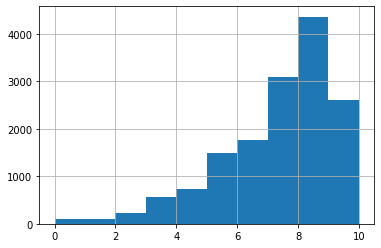

In [6]:
# Histogram to look at distribution
denmark_hap_filter['happiness_rating'].hist()

In [7]:
denmark_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,Faroe Islands,Denmark,61.8926,-6.9118,2020-01-22,0
1,1,Greenland,Denmark,71.7069,-42.6043,2020-01-22,0
2,2,NaN,Denmark,56.2639,9.5018,2020-01-22,0
3,3,Faroe Islands,Denmark,61.8926,-6.9118,2020-01-23,0
4,4,Greenland,Denmark,71.7069,-42.6043,2020-01-23,0
...,...,...,...,...,...,...,...
946,946,Greenland,Denmark,71.7069,-42.6043,2020-12-02,18
947,947,NaN,Denmark,56.2639,9.5018,2020-12-02,83535
948,948,Faroe Islands,Denmark,61.8926,-6.9118,2020-12-03,505
949,949,Greenland,Denmark,71.7069,-42.6043,2020-12-03,18


In [8]:
denmark_cov.shape

(951, 7)

In [9]:
denmark_cov['cases'].describe()

count      951.000000
mean      6096.119874
std      13974.161386
min          0.000000
25%         13.000000
50%        187.000000
75%       5727.000000
max      85140.000000
Name: cases, dtype: float64

In [10]:
denmark_cov = denmark_cov[['date','cases']]
denmark_cov

,date,cases
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-23,0
...,...,...
946,2020-12-02,18
947,2020-12-02,83535
948,2020-12-03,505
949,2020-12-03,18


### Group COVID-19 cases by date

First, get a better idea of cases patterns in Denmark

In [11]:
denmark_cov['date'] = pd.to_datetime(denmark_cov['date'])

In [12]:
denmark_date_cov= denmark_cov.groupby('date').sum()
denmark_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-11-29,79872
2020-11-30,81002
2020-12-01,82470


Text(0, 0.5, 'Cases')

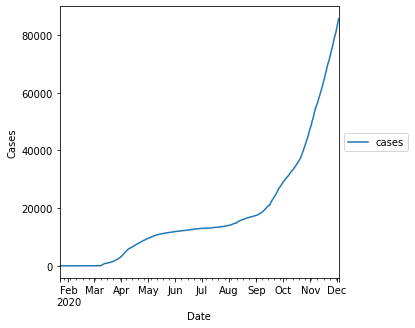

In [13]:
denmark_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

wow...the dramatic surge at the end

### Calculating daily changes in COVID-19 cases count

Might be more meaningful to look at daily changes (difference between two consecutive days) in cases rather than absolute cumulative counts to identify specific days/periods of time with surges in cases

In [14]:
## create new column for calculating daily differences
denmark_date_cov['daily_change'] = denmark_date_cov['cases'].diff()
denmark_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,79872,998.0
2020-11-30,81002,1130.0
2020-12-01,82470,1468.0


<AxesSubplot:xlabel='date'>

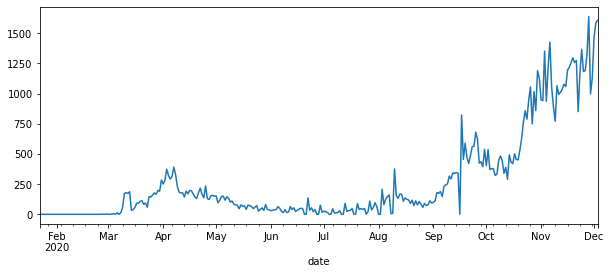

In [15]:
# plot of daily change in cases
denmark_date_cov['daily_change'].plot(figsize=(10,4))

### Observations

Quite a few notable months with surges; the first is in April, the second between Sept and Oct, and the last one is still ongoing since November.

#### Exported to clean csv

In [16]:
denmark_date_cov.to_csv('../data/exported_subset_data/covid/covid_denmark.csv')

### Group happiness ratings by date

In [17]:
denmark_df=denmark_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [18]:
denmark_df

,date,happiness_rating
0,2020-01-11,7.075000
1,2020-02-09,6.686016
2,2020-02-10,6.403727
3,2020-02-11,5.894737
4,2020-03-09,6.853403
...,...,...
89,2020-11-15,7.524324
90,2020-11-16,7.293103
91,2020-12-07,7.428571
92,2020-12-08,8.000000


## Happiness rating grouped by days vs. COVID-19 daily case changes

<AxesSubplot:xlabel='date'>

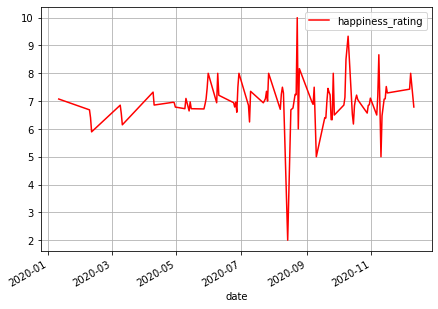

In [40]:
denmark_df.plot(x='date',y='happiness_rating', color='red',grid=True, figsize=(7,5))


<AxesSubplot:xlabel='date'>

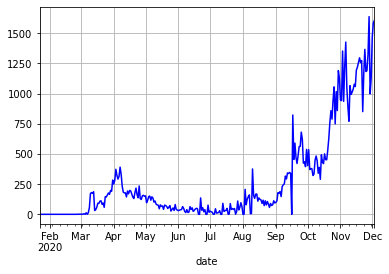

In [38]:
denmark_date_cov['daily_change'].plot(color='blue', grid=True)

### Observations
The happiness plot is so spiky...it's difficult to extract any meaningful information out of this. There's that huge dip in the red line (happiness) between Aug and Sept that seems to lag behind the start of a second wave of cases around that time. Going to look into broader timeframes to plot to see if a clearer analysis can be done. First going to try to do monthly analysis

### Create new column with just month and year for date

In [20]:
denmark_df['month_year'] = pd.to_datetime(denmark_df['date']).dt.to_period('M')

In [21]:
denmark_df['date'] = pd.to_datetime(denmark_df['date'])

In [22]:
denmark_df

,date,happiness_rating,month_year
0,2020-01-11,7.075000,2020-01
1,2020-02-09,6.686016,2020-02
2,2020-02-10,6.403727,2020-02
3,2020-02-11,5.894737,2020-02
4,2020-03-09,6.853403,2020-03
...,...,...,...
89,2020-11-15,7.524324,2020-11
90,2020-11-16,7.293103,2020-11
91,2020-12-07,7.428571,2020-12
92,2020-12-08,8.000000,2020-12


In [23]:
merged_df= pd.merge(left=denmark_df, left_on='date',
         right=denmark_date_cov, right_on='date')

In [24]:
merged_df['month_year'] = pd.to_datetime(merged_df['date']).dt.to_period('M')

<AxesSubplot:label='c16cd3c0-bf28-4cd0-bb6e-8af0924b6d25'>

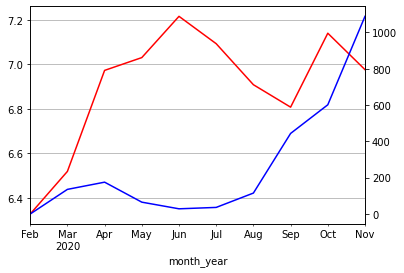

In [25]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations
This is better, but almost too generalized. However, it does appear that happiness and cases data mirror each other -- so when cases are lower, happiness ratings are higher and vice versa. For example, low cases between May and August (blue) but higher happiness and peak happiness between those same months.

In [26]:
di = {'week 2': '2020-04-28',
      'week 3': '2020-05-13',
      'week 4': '2020-05-27',
      'week 5': '2020-06-09',
      'week 6': '2020-06-24',
      'week 7': '2020-07-08',
      'week 8': '2020-07-22',
      'week 9': '2020-08-06',
      'week 10': '2020-08-19',
      'week 11': '2020-09-02',
      'week 12': '2020-09-18',
      'week 13': '2020-10-02',
      'week 14': '2020-10-14',
      'week 15': '2020-10-28',
      'week 16': '2020-11-11',}
denmark_hap_filter['week']= denmark_hap_filter['week'].map(di)  

In [27]:
denmark_hap_filter['week'] = pd.to_datetime(denmark_hap_filter['week'])

### Weekly happiness ratings and weekly COVID-19 

In [28]:
weekly_covid= denmark_date_cov.rolling(7).mean()

<AxesSubplot:label='a544ae6d-95e3-4cbc-84c8-5a983e605e9e'>

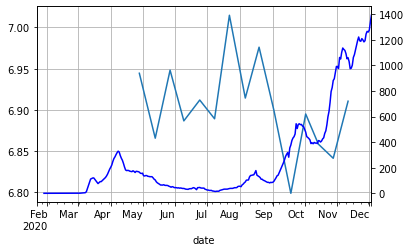

In [29]:
weekly = denmark_hap_filter.groupby('week')['happiness_rating'].mean()
weekly.plot()
weekly_covid['daily_change'].plot(color='blue', grid=True, secondary_y=True)

### Observations
Less spiky than the daily happiness plot, but perhaps less useful than the monthly plot.

## Interpolated Happiness Ratings

Since cases data is available on a daily basis, but happiness data is not in 2020, interpolated rolling means can be used for the happiness data.

In [30]:
denmark_df_daily=denmark_df.set_index(pd.to_datetime(denmark_df['date']))

In [31]:
denmark_df_daily=denmark_df_daily[['date', 'happiness_rating']]

<AxesSubplot:xlabel='date'>

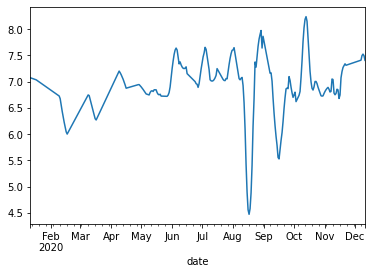

In [32]:
denmark_df_daily.resample('D').interpolate().rolling('7D')['happiness_rating'].mean().plot()


In [33]:
denmark_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_denmark.csv')

<AxesSubplot:label='70125816-d428-45cb-ad1b-627aacdb4f5b'>

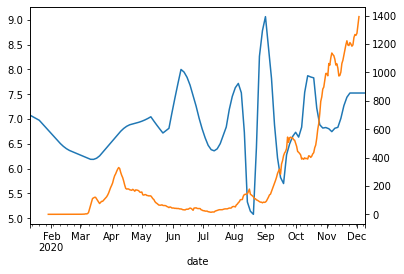

In [34]:
denmark_df_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations
So there are some correlations! March through May spike in cases accompanied by dip in happiness to around 6; huge dip in happiness between Aug and Sept associated with second notable increase in daily case changes; huge peak in happiness in Sept once this second surge was controlled; pattern again evident in November. As cases continue to surge in December and onwards, I wonder how happiness will look in 2021...

## Happiness rating mean for 2020 as a whole in Denmark

In [35]:
denmark_hap_filter['happiness_rating'].mean()

6.903236525553266

### Observations
Denmark's happiness rating in 2019 was 7.69. Relatively significant decrease in happiness rating in 2020. This matches what I expected given the number of cases, the surges, and the large fluctuations that to some extent do mirror some patterns in happiness.